# ElasticNet Regression ( combination of L1 & L2 Regularization)

In [1]:
import pandas as pd

In [2]:
cars= pd.read_csv("auto_mpg_preprocessed.csv")

In [3]:
cars.head(2)

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [4]:
# lets divide the target and independent features
X= cars.drop("price", axis=1)
y= cars["price"]

In [5]:
# lets split the data in to train and test 
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
len(X_train), len(y_train)

(153, 153)

In [8]:
len(X_test), len(y_test)

(52, 52)

In [9]:
# lets scale the features
from sklearn.preprocessing import StandardScaler

In [10]:
# initialize the scaler
scaler= StandardScaler()

In [11]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [12]:
# lets build the model (ElasticNet)
from sklearn.linear_model import ElasticNet

In [13]:
# initialize the model
alpha= 0.1
l1_ratio= 0.5
elastic_net= ElasticNet(alpha= alpha, l1_ratio= l1_ratio, random_state=42)

In [14]:
# lets fit the model on train data
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [15]:
# evaluate the model
y_pred= elastic_net.predict(X_test_scaled)

In [16]:
# lets get the paramters from the model
for idx, col_name in enumerate(X_train.columns):
    print("The Coefficients for {}: {}".format(col_name, elastic_net.coef_[idx]))

The Coefficients for symboling: 585.5360050010335
The Coefficients for wheel_base: 561.7302335832602
The Coefficients for length: 238.66461382564432
The Coefficients for width: 353.95810164429804
The Coefficients for height: 263.0071384035952
The Coefficients for curb_weight: 659.2387729433574
The Coefficients for num_of_cylinders: -160.58469970312942
The Coefficients for engine_size: 4534.743167330312
The Coefficients for bore: -346.14133717748695
The Coefficients for stroke: -829.7147607144472
The Coefficients for compression_ratio: 890.209900252855
The Coefficients for horsepower: 295.48299323177963
The Coefficients for peak_rpm: 951.6267172413216
The Coefficients for city_mpg: -677.2316939521717
The Coefficients for highway_mpg: -953.4151639979942


In [17]:
# intercept
elastic_net.intercept_

13238.418300653595

In [22]:
# get metrics
from sklearn.metrics import r2_score, mean_squared_error

r2_square= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)

In [19]:
r2_square

0.7752337184359601

In [20]:
mse

15094056.65162712

In [23]:
rmse= mean_squared_error(y_test, y_pred, squared=False)
# import numpy as np
# rmse= np.sqrt(mse)

In [24]:
rmse

3885.107032197069

In [27]:
import matplotlib.pyplot as plt

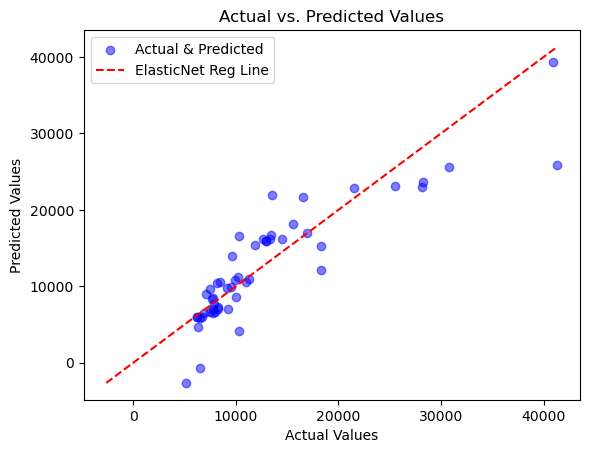

In [28]:
# visualize the model fit
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Actual & Predicted")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="ElasticNet Reg Line")


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

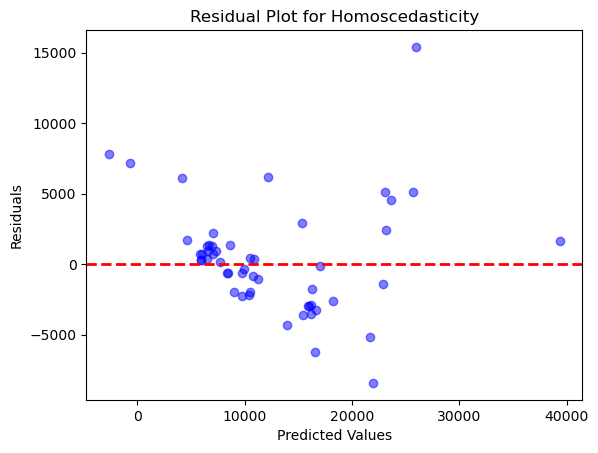

In [30]:
# check the homoscedasticity and heteroscedasticity by plotting the Residuals
residuals= y_test - y_pred

plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle= "--", linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity")
plt.show()